In [1]:
import numpy as np
import pandas as pd

In [2]:
dfm = pd.read_csv('athlete_events.csv')
reg_df = pd.read_csv('noc_regions.csv')

In [3]:
dfm.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
dfm = dfm[dfm['Season'] == 'Summer']

In [5]:
reg_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [6]:
dfm = dfm.merge(reg_df, on='NOC', how='left')

In [7]:
dfm.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [8]:
dfm.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [9]:
dfm['Medal'].value_counts()

Medal
Gold      11459
Bronze    11409
Silver    11220
Name: count, dtype: int64

In [10]:
dfm=pd.concat([dfm, pd.get_dummies(dfm['Medal'])], axis=1)

In [11]:
dfm[['Gold', 'Silver', 'Bronze']] = dfm[['Gold', 'Silver', 'Bronze']].astype(int)


In [12]:
dfm.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [13]:
dfm.groupby('NOC').agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    **{col: 'first' for col in dfm.columns if col not in ['NOC', 'Gold', 'Silver', 'Bronze']}
}).sort_values('Gold', ascending=False).reset_index()


NOC  Gold  Silver  Bronze     ID                          Name Sex   Age  \
0    USA  2472    1333    1197     84          Stephen Anthony Abas   M  26.0   
1    URS   832     635     596     87  Rost'om Omeris dze Abashidze   M  29.0   
2    GBR   636     729     620    453                 Leslie Ablett   M  24.0   
3    GER   592     538     649    133                     Franz Abb   M  45.0   
4    ITA   518     474     454     62             Giovanni Abagnale   M  21.0   
..   ...   ...     ...     ...    ...                           ...  ..   ...   
225  AHO     0       1       0   1021         Eduardo "Bto" Adriana   M  35.0   
226  LBR     0       0       0    888           Jangy McKinley Addy   M  23.0   
227  LCA     0       0       0   5947                 Jordan Augier   M  21.0   
228  LES     0       0       0  48896                 Kenneth Hlasa   M  25.0   
229  LBA     0       0       0    204          Moustafa Abdel Naser   M  21.0   

     Height  Weight                  Team        Games  Year  Season  \
0     165.0    55.0         United States  2004 Summer  2004  Summer   
1     188.0    97.0          Soviet Union  1964 Summer  1964  Summer   
2     175.0    64.0         Great Britain  1928 Summer  1928  Summer   
3     165.0    55.0               Germany  1900 Summer  1900  Summer   
4     198.0    90.0                 Italy  2016 Summer  2016  Summer   
..      ...     ...                   ...          ...   ...     ...   
225   176.0   120.0  Netherlands Antilles  1960 Summer  1960  Summer   
226   188.0    88.0               Liberia  2008 Summer  2008  Summer   
227   171.0    53.0           Saint Lucia  2016 Summer  2016  Summer   
228   170.0    67.0               Lesotho  1980 Summer  1980  Summer   
229   176.0    74.0                 Libya  1996 Summer  1996  Summer   

               City          Sport  \
0            Athina      Wrestling   
1             Tokyo      Wrestling   
2         Amsterdam     Water Polo   
3             Paris     Gymnastics   
4    Rio de Janeiro         Rowing   
..              ...            ...   
225            Roma  Weightlifting   
226         Beijing      Athletics   
227  Rio de Janeiro       Swimming   
228          Moskva      Athletics   
229         Atlanta      Athletics   

                                              Event   Medal       region  \
0          Wrestling Men's Featherweight, Freestyle  Silver          USA   
1    Wrestling Men's Light-Heavyweight, Greco-Roman    Gold       Russia   
2                       Water Polo Men's Water Polo  Bronze           UK   
3            Gymnastics Men's Individual All-Around  Bronze      Germany   
4                        Rowing Men's Coxless Pairs  Bronze        Italy   
..                                              ...     ...          ...   
225                 Weightlifting Men's Heavyweight  Silver      Curacao   
226                       Athletics Men's Decathlon    None      Liberia   
227              Swimming Men's 50 metres Freestyle    None  Saint Lucia   
228                      Athletics Men's 800 metres    None      Lesotho   
229                      Athletics Men's 400 metres    None        Libya   

                    notes  
0                    None  
1                    None  
2                    None  
3                    None  
4                    None  
..                    ...  
225  Netherlands Antilles  
226                  None  
227                  None  
228                  None  
229                  None  

[230 rows x 20 columns]

In [14]:
medal_tallyy = dfm.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event' , 'Medal'])

In [15]:
medal_tallyy = medal_tallyy.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [16]:
print(medal_tallyy.columns)


Index(['region', 'Gold', 'Silver', 'Bronze'], dtype='object')


In [17]:
medal_tallyy['total'] = medal_tallyy['Gold'] + medal_tallyy['Silver'] + medal_tallyy['Bronze']

In [18]:
medal_tallyy

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [19]:
years = dfm['Year'].unique().tolist()

In [20]:
years.sort()

In [21]:
years.insert(0, 'Overall')

In [22]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [23]:
country = np.unique(dfm['region'].dropna().values).tolist()

In [24]:
country.sort()

In [25]:
country.insert(0, 'Overall')

In [26]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [27]:
def fetch_medal_tally(year, country):
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year != 'Overall' and country != 'Overall':
        pass

In [28]:
medal_df = dfm.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event' , 'Medal'])

In [29]:
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [30]:
def fetch_medal_tallyy(dfm, year, country):
    medal_df = dfm.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event' , 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country!= 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]  
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]  # Fixed line
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)


In [31]:
medal_df = dfm.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event' , 'Medal'])

In [32]:
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [69]:
fetch_medal_tallyy(dfm,year='1900', country='India')

#Overall Analysis



  region  Gold  Silver  Bronze  total
0  India     0       2       0      2


In [71]:
dfm['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [73]:
dfm['Year'].unique().shape[0] - 1

28

In [75]:
dfm['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [77]:
dfm['Event'].unique().shape

(651,)

In [79]:
dfm['Name'].unique().shape

(116122,)

In [81]:
dfm['region'].unique().shape

(206,)

In [83]:
nations_over_time=dfm.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [85]:
nations_over_time

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [87]:
import plotly.express as px

In [88]:
nations_over_time.rename(columns={'Year': 'Edition','count':"No of Countries"}, inplace=True)

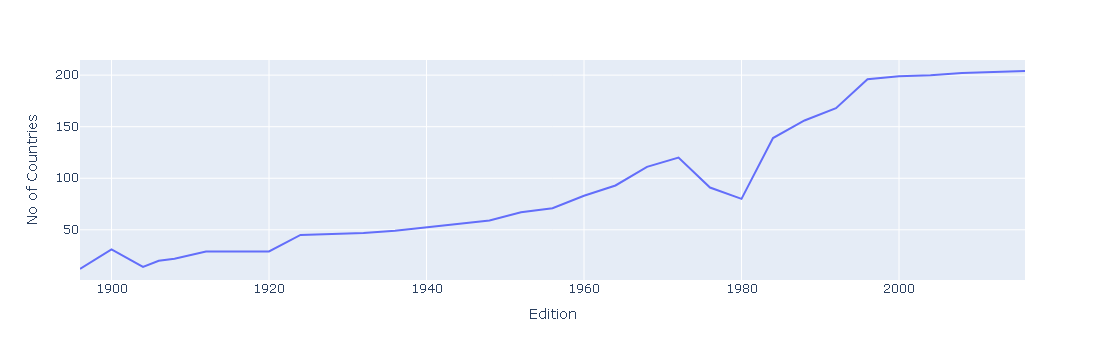

In [89]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries")
fig.show()

In [90]:
dfm.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [93]:
x = dfm.drop_duplicates(['Year', 'Sport', 'Event'])

In [94]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

<Axes: xlabel='Year', ylabel='Sport'>

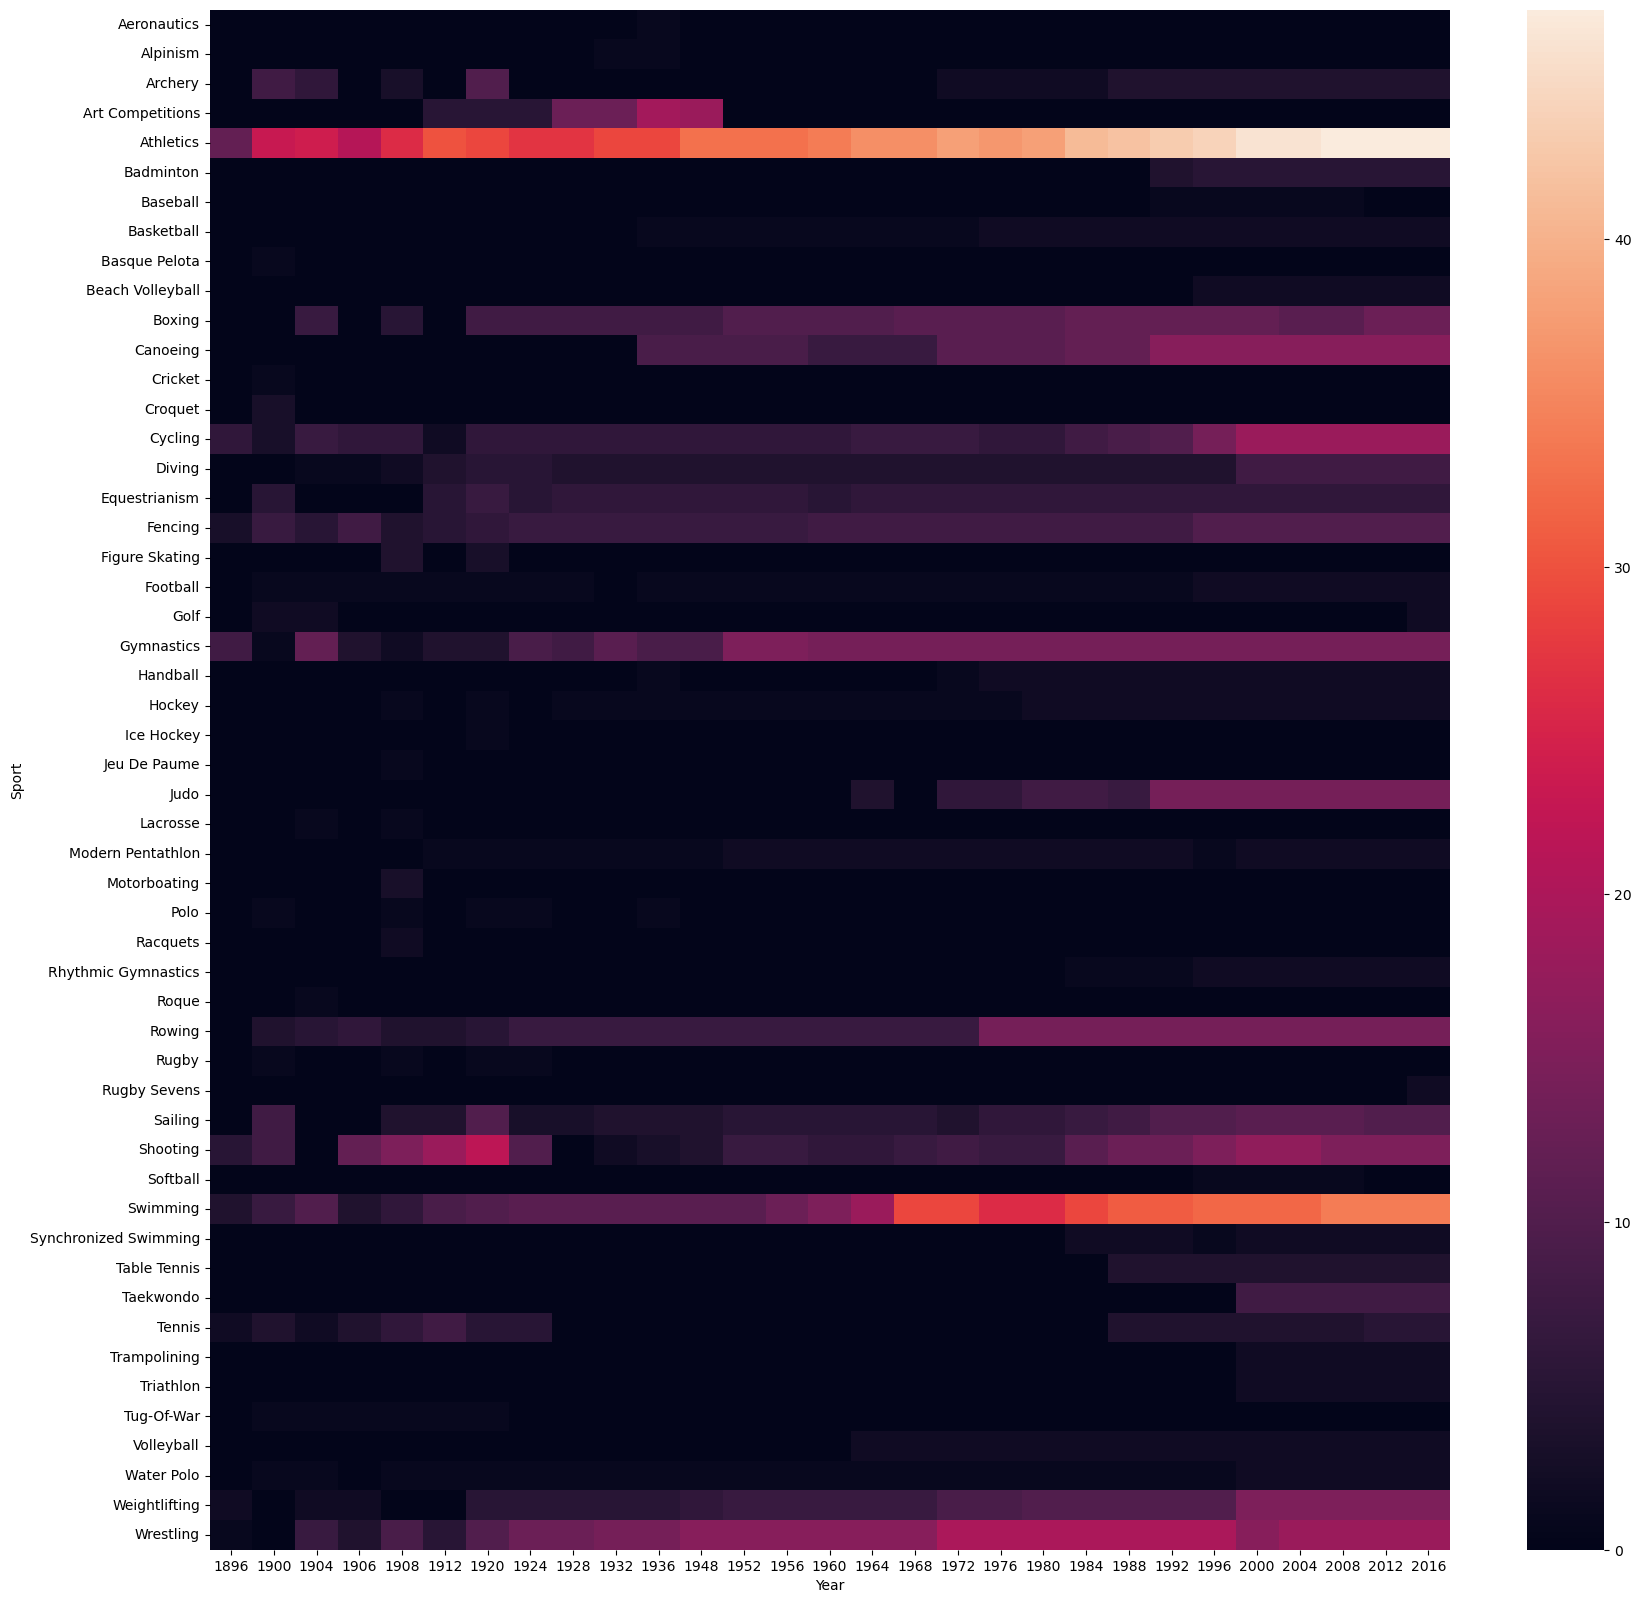

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt  # plt is from matplotlib
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'))

In [111]:
def most_successful(df, sport):
    temp_df = dfm.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, on='Name', how='left')[['Name', 'count','Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

In [113]:
most_successful(dfm, 'Gymnastics')

Name  Medals       Sport          region
0    Larysa Semenivna Latynina (Diriy-)      18  Gymnastics          Russia
19         Nikolay Yefimovich Andrianov      15  Gymnastics          Russia
43          Borys Anfiyanovych Shakhlin      13  Gymnastics          Russia
67                          Takashi Ono      13  Gymnastics           Japan
100                          Sawao Kato      12  Gymnastics           Japan
124             Aleksey Yuryevich Nemov      12  Gymnastics          Russia
145           Viktor Ivanovych Chukarin      11  Gymnastics          Russia
161              Vra slavsk (-Odloilov)      11  Gymnastics  Czech Republic
179           gnes Keleti-Srkny (Klein)      10  Gymnastics         Hungary
193       Vitaly Venediktovich Shcherbo      10  Gymnastics          Russia
209     Aleksandr Nikolayevich Dityatin      10  Gymnastics          Russia
225         Polina Hryhorivna Astakhova      10  Gymnastics          Russia
244                    Akinori Nakayama      10  Gymnastics           Japan
260       Nadia Elena Comneci (-Conner)       9  Gymnastics         Romania
272           Yury Yevlampiyevich Titov       9  Gymnastics          Russia

In [115]:
dfm

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[222552 rows x 20 columns]

In [117]:
temp = dfm.dropna(subset=['Medal'])

In [119]:
temp.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event' , 'Medal'], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\1155393637.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
new_df = temp[temp['region'] =='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [123]:
final_df

Year  Medal
0   1900      2
1   1928      1
2   1932      1
3   1936      1
4   1948      1
5   1952      2
6   1956      1
7   1960      1
8   1964      1
9   1968      1
10  1972      1
11  1980      1
12  1996      1
13  2000      1
14  2004      1
15  2008      3
16  2012      6
17  2016      2

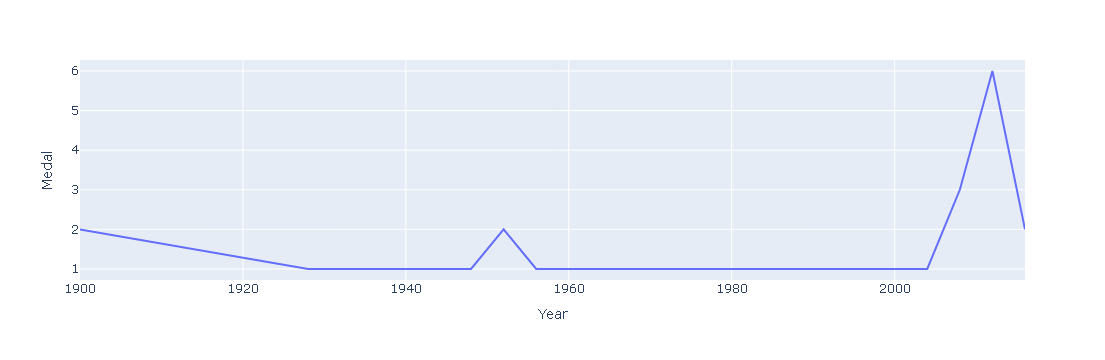

In [125]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

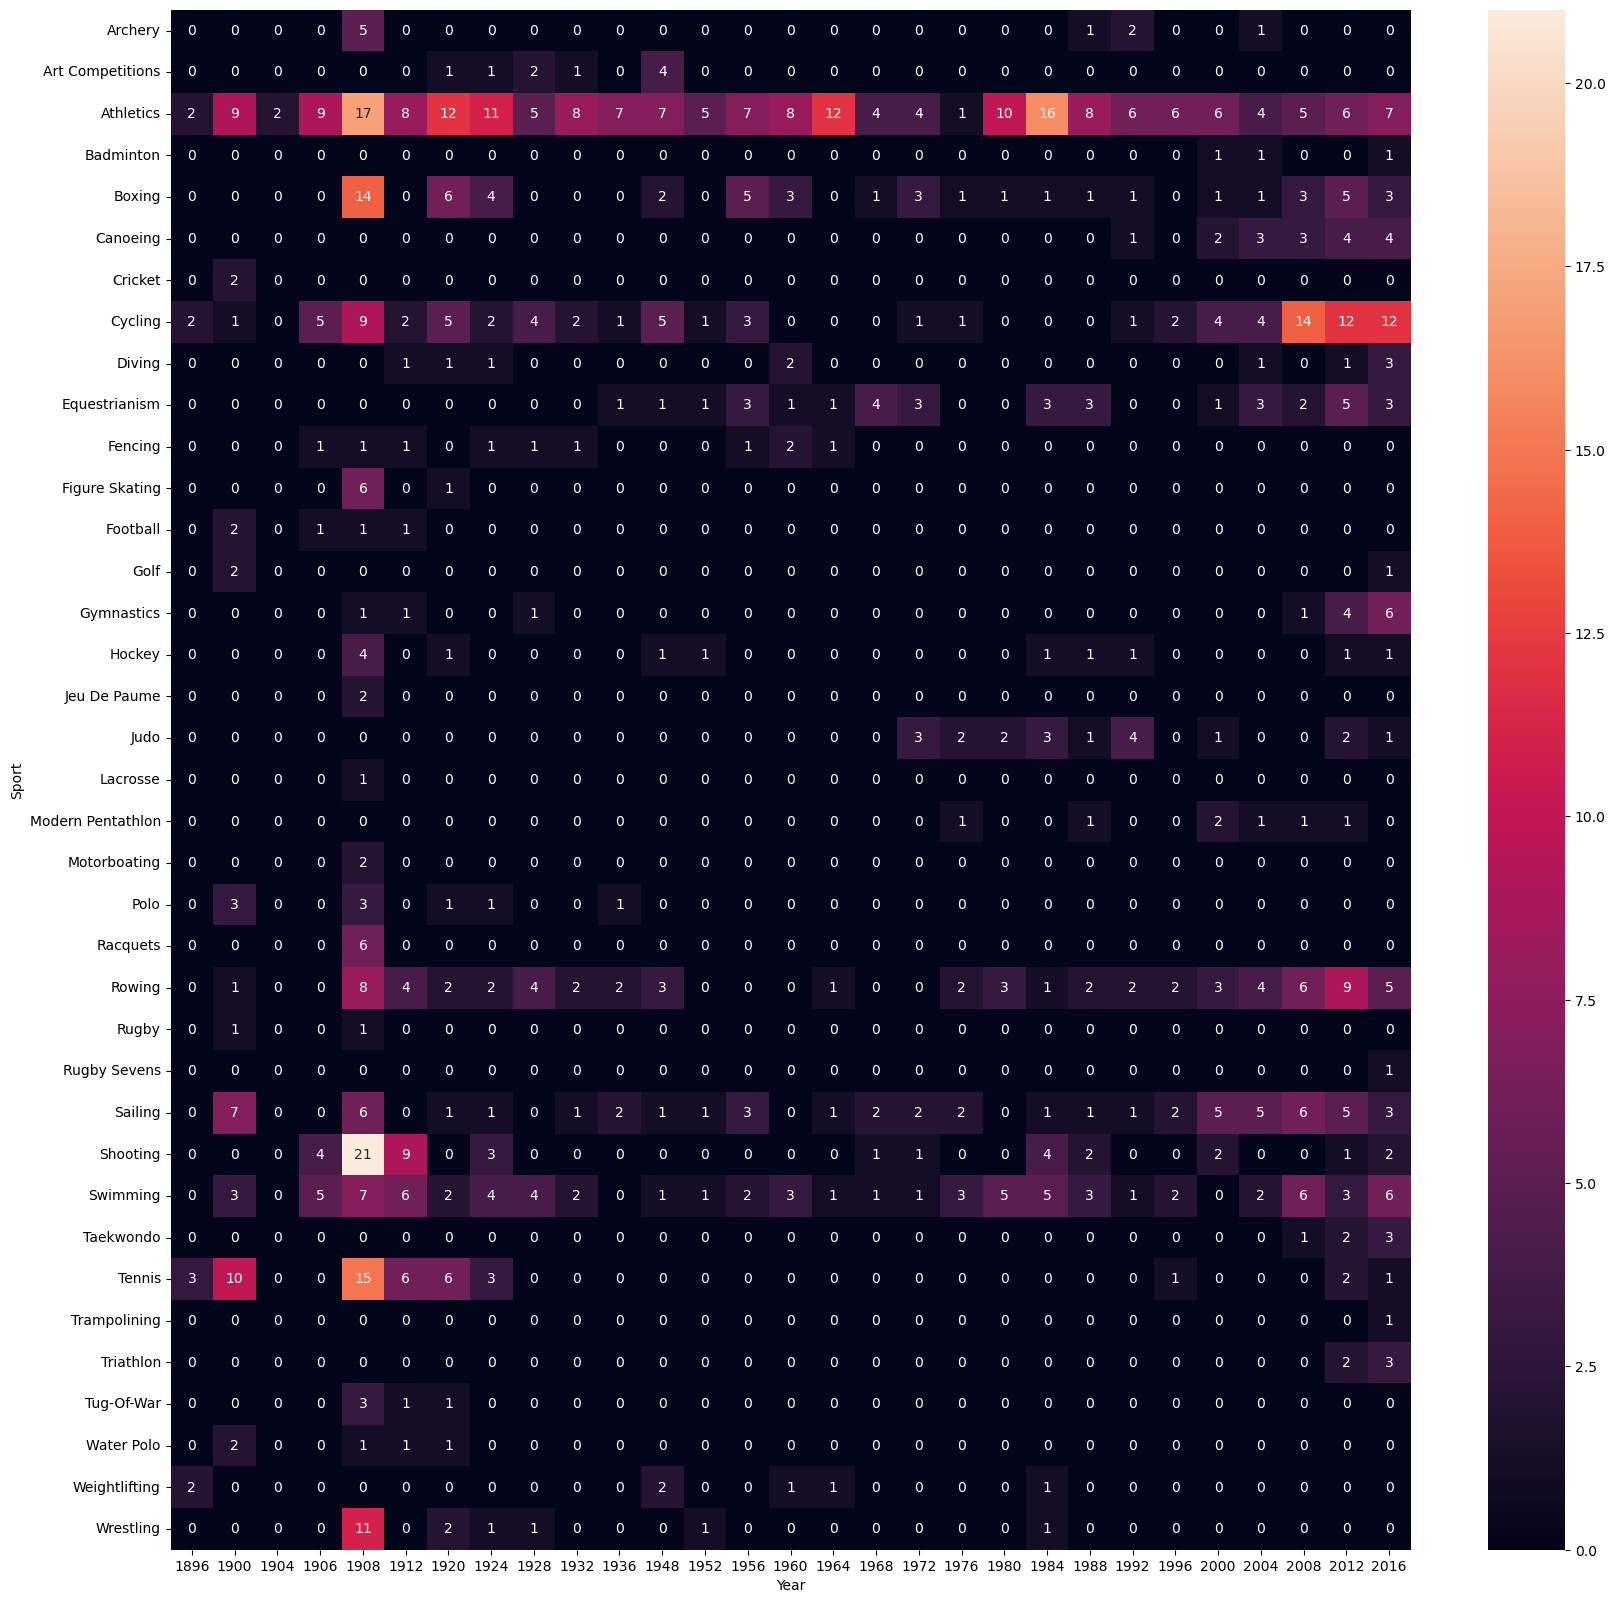

In [127]:
new_df = temp[temp['region'] =='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)

In [128]:
def most_successful(df, country):
    temp_df = dfm.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, on='Name', how='left')[['Name', 'count','Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

In [129]:
most_successful(dfm, 'Jamaica')

Name  Medals      Sport
0           Merlene Joyce Ottey-Page       9  Athletics
19   Veronica Angella Campbell-Brown       8  Athletics
30                Usain St. Leo Bolt       8  Athletics
40           Shelly-Ann Fraser-Pryce       6  Athletics
47     Donald O'Reilly "Don" Quarrie       4  Athletics
56     Herbert Henry "Herb" McKenley       4  Athletics
62               Arthur Stanley Wint       4  Athletics
68    Novlene Hilaire Williams-Mills       4  Athletics
75                       Yohan Blake       4  Athletics
81          Sherone Anmarica Simpson       3  Athletics
88              Juliet Jean Cuthbert       3  Athletics
98                    Kerron Stewart       3  Athletics
103                  Elaine Thompson       3  Athletics
106         Shericka Nicola Williams       3  Athletics
109      Beverly McDonald (-Stewart)       3  Athletics

In [130]:
#Athlete wise Analysis started

In [131]:
import plotly.figure_factory as ff

In [132]:
athlete_df = dfm.drop_duplicates(subset=['Name', 'region'])

In [139]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()

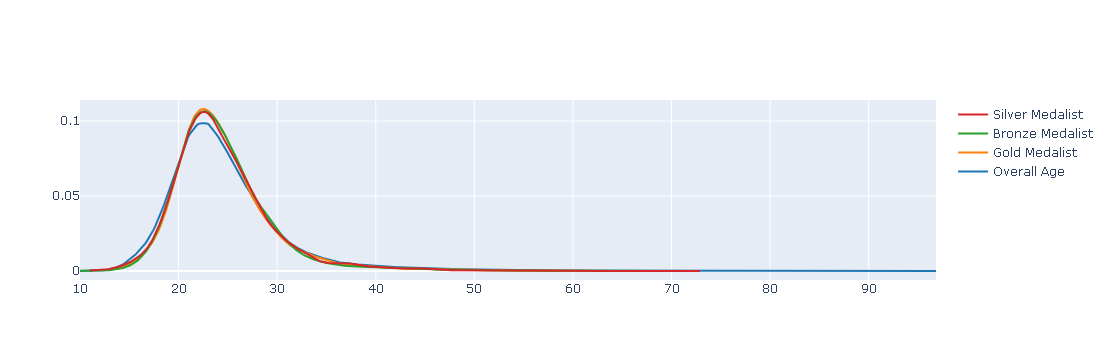

In [141]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Bronze Medalist','Silver Medalist'], show_hist=False, show_rug=False)
fig.show()

In [142]:
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222544       Russia   NaN       1     0       0  
222546    Argentina   NaN       0     0       0  
222548          USA   NaN       0     0       0  
222549       Russia   NaN       0     0       0  
222551      Belarus   NaN       0     0       0  

[116885 rows x 20 columns]

In [155]:
    famous_sports = [
    "Football", "Tug-of-War", "Art Competitions", "Weightlifting", "Wrestling",
    "Water Polo", "Hockey", "Rowing", "Fencing", "Shooting", "Boxing", "Taekwondo",
    "Cycling", "Diving", "Ice Hockey", "Basketball", "Judo", "Swimming",
    "Badminton", "Sailing", "Gymnastics", "Athletics", "Canoeing", "Tennis",
    "Golf", "Softball", "Archery", "Volleyball", "Synchronized Swimming",
    "Table Tennis", "Baseball", "Rhythmic Gymnastics", "Rugby Sevens",
    "Beach Volleyball", "Triathlon", "Rugby"]


In [145]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25604\2256303489.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

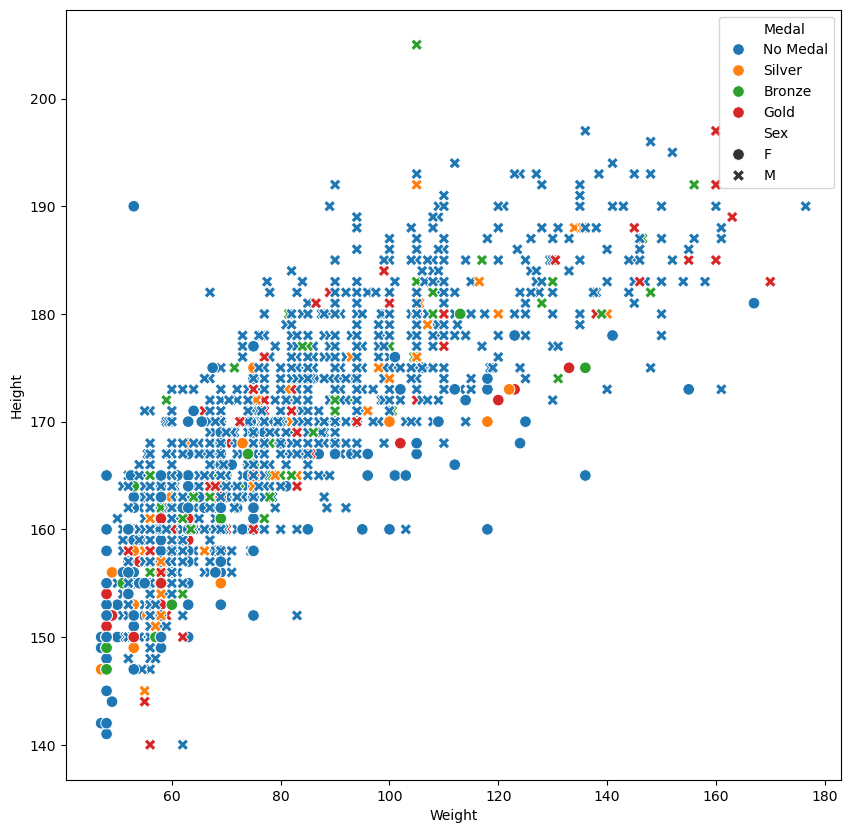

In [163]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'], hue=temp_df["Medal"], style=temp_df['Sex'], s=70)

In [169]:
# Count the occurrences of each sport
sport_counts = athlete_df['Sport'].value_counts()

# Extract the top N most famous sports (e.g., top 10)
top_sports = sport_counts.head(25)  

# Display the most famous sports
print(top_sports)


Sport
Athletics            22071
Swimming              8646
Rowing                7669
Football              6140
Cycling               5807
Boxing                5245
Wrestling             4988
Shooting              4873
Sailing               4489
Gymnastics            4102
Fencing               4057
Hockey                3797
Basketball            3407
Canoeing              3226
Weightlifting         2873
Judo                  2727
Handball              2697
Water Polo            2564
Volleyball            2491
Equestrianism         2337
Art Competitions      1795
Diving                1451
Tennis                1243
Archery               1113
Modern Pentathlon      849
Name: count, dtype: int64


In [179]:
most_famous_sports = athlete_df['Sport'].value_counts().head(25).index.tolist()
print(most_famous_sports)

['Athletics', 'Swimming', 'Rowing', 'Football', 'Cycling', 'Boxing', 'Wrestling', 'Shooting', 'Sailing', 'Gymnastics', 'Fencing', 'Hockey', 'Basketball', 'Canoeing', 'Weightlifting', 'Judo', 'Handball', 'Water Polo', 'Volleyball', 'Equestrianism', 'Art Competitions', 'Diving', 'Tennis', 'Archery', 'Modern Pentathlon']


In [185]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [197]:
final = men.merge(women,on='Year', how='left')

In [199]:
final.rename(columns={'Name_x':'Male', 'Name_y':'Female'}, inplace=True)

In [203]:
final.fillna(0, inplace=True)

In [205]:
final

Year  Male  Female
0   1896   174     0.0
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

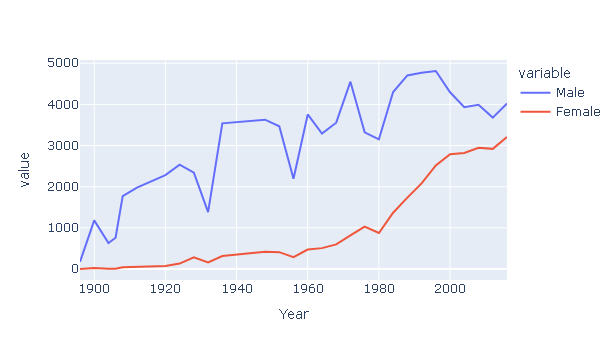

In [207]:
fig = px.line(final, x='Year', y=['Male', 'Female'])
fig.show()